## 피벗테이블

피벗테이블(pivot table)은 입력값으로 간단한 열 단위의 데이터를 취하고 그 데이터에 대한 다차원 요약을 제공하는 테이블을 구성하는 방법이다.

In [11]:
import seaborn as sns

In [12]:
titanic = sns.load_dataset('titanic')

In [13]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


성별에 따른 평균 생존율을 구한다면?

In [14]:
titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [15]:
titanic.groupby(['sex', 'class'])['survived'].mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### 피벗 테이블 구문

In [16]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### 다단계 피벗 테이블

피벗 테이블의 그룹핑은 다단계로 여러 옵션을 통해 지정할 수 있다

In [17]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [22]:
import pandas as pd
age = pd.cut(titanic['age'],[0,18,80])

데이터를 값을 기준으로 구간을 생성

titanic['age'] 값이 0~18까지 18~80까지 
2개의 구간으로 나눈다.

In [25]:
titanic.pivot_table('survived', index=['sex', age], 
                    columns='class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [37]:
fare = pd.qcut(titanic['fare'],2,labels=['저가','고가'])
fare.head()

0    저가
1    고가
2    저가
3    고가
4    저가
Name: fare, dtype: category
Categories (2, object): [저가 < 고가]

In [30]:
pd.value_counts(fare)

저가    447
고가    444
Name: fare, dtype: int64

In [32]:
titanic.pivot_table('survived', index=['sex', age],
                   columns=[fare, 'class'])

fare               저가                            고가                    
class           First    Second     Third     First    Second     Third
sex    age                                                             
female (0, 18]    NaN  1.000000  0.714286  0.909091  1.000000  0.318182
       (18, 80]   NaN  0.880000  0.444444  0.972973  0.914286  0.391304
male   (0, 18]    NaN  0.000000  0.260870  0.800000  0.818182  0.178571
       (18, 80]   0.0  0.098039  0.125000  0.391304  0.030303  0.192308

### 기타 피벗 테이블 옵션 

피벗테이블의 옵션에서 aggfunc 키워드는 어떤 유형의 집계를 적용할지 제어한다(기본값 : 평균). 평균이외에 'count', 'min', 'max' 등을 활용가능하고 딕셔너리를 활용하여 열마다 다르게 집계 할 수도 있다.

In [34]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':'sum', 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

##### Quiz)
타이타닉 데이터프레임을 활용하여, 성별을 기준으로 탑승자의 
평균 연령과 수를 구하세요



In [38]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [42]:
titanic.pivot_table(index='sex',
                   aggfunc={'age':'mean', 'sex':'count'})

,age,sex
sex,,
female,27.915709,314
male,30.726645,577


In [43]:
pd.value_counts(titanic['sex'])

male      577
female    314
Name: sex, dtype: int64

In [44]:
titanic.groupby(['sex'])['age'].mean()

sex
female    27.915709
male      30.726645
Name: age, dtype: float64

margins 키워드를 통해 그룹별 총합을 계산할 수 있다.

In [47]:
titanic.pivot_table('survived', index='sex',
                   columns='class', margins=True,
                   margins_name="합계")

class,First,Second,Third,합계
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
합계,0.629630,0.472826,0.242363,0.383838


### 예제

In [51]:
births = pd.read_csv(r'c:\births.csv')

In [53]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [54]:
births['decade'] = (births['year'] // 10) * 10
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [55]:
births.pivot_table('births', index='decade',
                  columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [56]:
import matplotlib.pyplot as plt

In [57]:
sns.set()

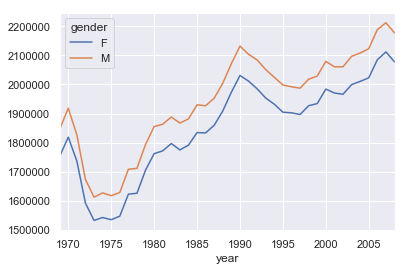

In [58]:
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()

## MatPlotlib를 활용한 시각화

Matplotlib는 다중 플랫폼 데이터 시각화 라이브러리이다. 다양한 운영체제에서 동작할 수 있는 점이 가장 큰 장점으로 파이썬에서도 활용할 수 있다.

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [62]:
x = np.linspace(0, 10, 5) # 0에서 10까지 5개의 숫자를 추린다.
x

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

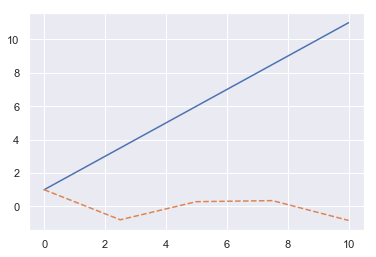

In [65]:
fig = plt.figure()
plt.plot(x, x+1, "-")
plt.plot(x, np.cos(x), '--')

##### 그림으로 저장하기

In [67]:
fig.savefig('myFigure.png')

##### 그림읽어오기

In [69]:
from IPython.display import Image

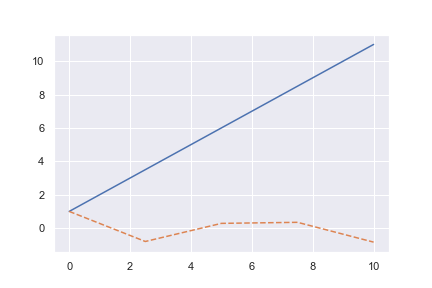

In [70]:
Image('./myFigure.png')

### 두가지 인터페이스

Matplotlib는 매트랩 스타일의 인터페이스와 객체지향 인터페이스 2가지를 지원한다.

#### 매트랩 인터페이스

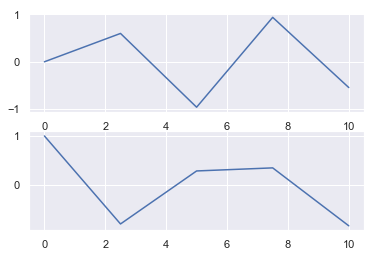

In [71]:
plt.figure() # 플롯 그림 생성

# 두개의 패널 중 첫 패널을 생성

plt.subplot(2, 1, 1) #(rows, columns, panel number)
plt.plot(x, np.sin(x))
# 두번째 패널 생성
plt.subplot(2, 1, 2) #(rows, columns, panel number)
plt.plot(x, np.cos(x))

### 객체지향 인터페이스

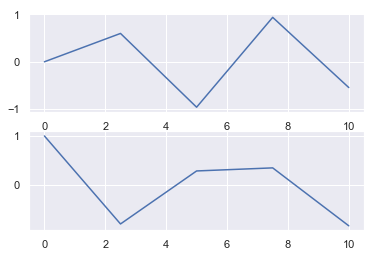

In [72]:
# 전체 플롯그리드(fig), 두 객체의 배열(ax) 생성
fig, ax = plt.subplots(2)

ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

### 라인 플롯

모든 Matplotlib 플롯은 그림(figure)와 축(axes)를 만드는 것으로 시작

- 그림(figure) : 축, 그래픽, 텍스트, 레이블을 표시하는 하나의 컨테이너(ex) 그림이 그려지는 종이)
- 축(axes) : 하나의 플롯 그래프( 영어에서 축을 의미하는 axis의 복수가 axes, 철자에 주의하자)
- axis : x축, y축을 의미

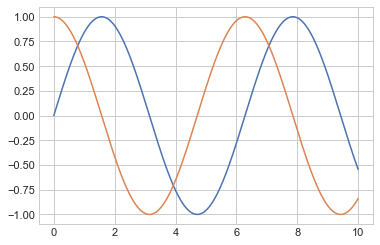

In [76]:
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = plt.axes()

x = np.linspace(0,10,1000)
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x))

### 플롯 수정하기 : 선 색상과 스타일

플롯에서 선의 색상을 수정할 때 plt.plot() 함수의 color 키워드를 사용

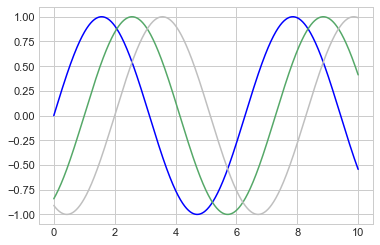

In [84]:
plt.plot(x, np.sin(x-0), color='blue') # 색이름
plt.plot(x, np.sin(x-1), color='g') # 색이름 축약(단일문자 표현)
plt.plot(x, np.sin(x-2), color='0.75') # 회색조(0~1)
#plt.plot(x, np.sin(x-3), color='#FFDD44') # RGB 코드(RRGGBB, 16진수)
#plt.plot(x, np.sin(x-4), color=(0,0,1))#RGBA 코드(0~1)


- RGBA 색상 예시

    (0,0,0) > 흰색
    (1,1,1) > 검정
    (1,0,0) > 빨강
    (1,0,0,1) > 빨강 (마지막 숫자는 투명도)

- 색상 볼수 있는 사이트 링크 : https://www.w3schools.com/colors/colors_names.asp

단일문자로 표현되는 색상은 RGB(Red, Green, Blue), CMYK(Cyan(청록), Magenta(자홍), Yellow, BlacK)의 약어이다.


linestyle 키워드를 활용하면 선 스타일을 선택할 수 있다.

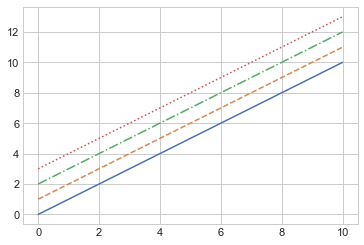

In [86]:
plt.plot(x, x+0, linestyle='solid')
plt.plot(x, x+1, linestyle='dashed')
plt.plot(x, x+2, linestyle='dashdot')
plt.plot(x, x+3, linestyle='dotted')

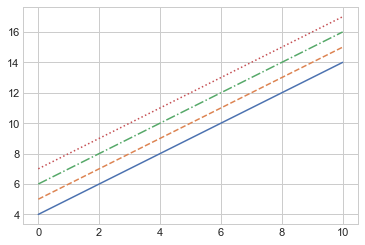

In [87]:
plt.plot(x, x+4, linestyle='-') #solid
plt.plot(x, x+5, linestyle='--') # dashed
plt.plot(x, x+6, linestyle='-.') #dashdot
plt.plot(x, x+7, linestyle=':') #dotted

linestyle과 color코드를 합쳐 표현할 수도 있다.

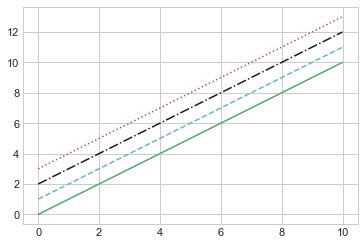

In [90]:
plt.plot(x, x+0, '-g')  # solid + green
plt.plot(x, x+1, '--c') # dashed + cyan
plt.plot(x, x+2, '-.k') # dashdot + black
plt.plot(x, x+3, ':r')  # dotted + red

단일문자로 표현되는 색상은 RGB(Red, Green, Blue), CMYK(Cyan(청록), Magenta(자홍), Yellow, BlacK)의 약어이다.

### 플롯 조정하기 : 축 경계


Matplotlib은 기본적으로 축 경계를 자동으로 설정한다. 축 경계를 조정하기 위해서는 plt.xlim(), plt.ylim() 매서드를 활용한다.

Matplotlib은 기본적으로 축 경계를 자동으로 설정한다. 축 경계를 조정하기 위해서는 plt.xlim(), plt.ylim() 매서드를 활용한다.

(-1.5, 1.5)

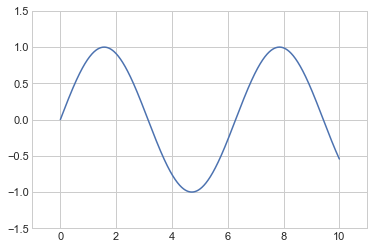

In [98]:

plt.plot(x, np.sin(x))
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)

(1.2, -1.2)

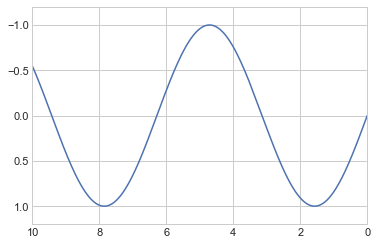

In [99]:
plt.plot(x, np.sin(x))
plt.xlim(10,0)
plt.ylim(1.2,-1.2)

plt.axis() 매서드는 [x축 최소값, x축 최대값, y축 최소값, y축 최대값]를 지정하는 리스트로 x, y축을 설정한다.

[-1, 11, -1.5, 1.5]

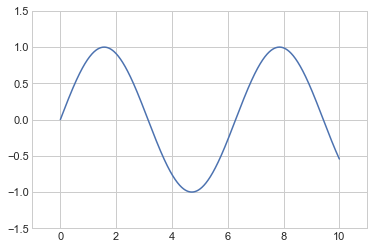

In [101]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5,1.5])

축에 대한 리스트 값 대신 plt.axis()의 매개변수로

'tight'를 주면 플롯 주변의 경계를 밀착시킬 수 있고,
'equal'을 지정하면 축의 단위를 똑같게 설정하여 보여준다.

(-0.5, 10.5, -1.0999971452300779, 1.099999549246729)

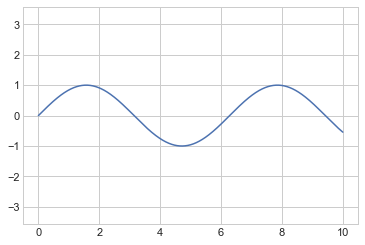

In [105]:
plt.plot(x, np.sin(x))
plt.axis('equal')

### 플롯에 레이블 붙이기

플롯에 제목, 축 레이블(축이름), 간단한 범례를 추가할 수 있다.

Text(0, 0.5, 'y=sin(x)')

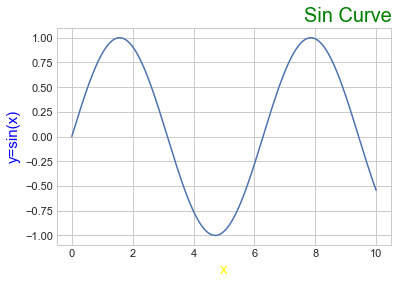

In [113]:
plt.plot(x, np.sin(x))
plt.title("Sin Curve", fontsize=20, color='green',
          loc='right') # loc=right | center | left
plt.xlabel("x", fontsize=15, color='yellow')
plt.ylabel("y=sin(x)", fontsize=15, color='blue')

범례를 만들려면 1) label 키워드를 사용해 각 라인의 레이블을 지정하고, 2) plt.legend() 메서드를 사용한다.



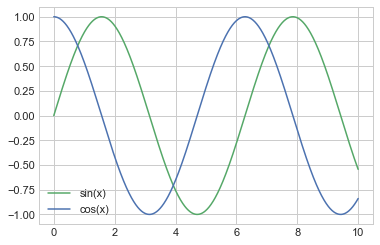

In [118]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), '-b', label='cos(x)')
plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


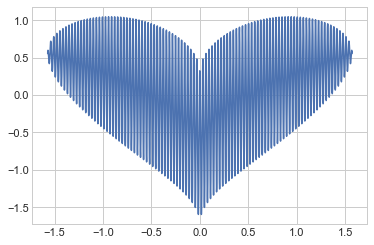

In [121]:
x = np.linspace(-2, 2, 100000)
y = lambda x: (np.sqrt(np.cos(x)) * np.cos(200 * x) + np.sqrt(abs(x)) - 0.7) * pow((4 - x * x), 0.01)
    
plt.plot(x, list(map(y,x)))


##### Quiz) 
다음 데이터로 그래프를 그리세요

Text(0, 0.5, 'RATE')

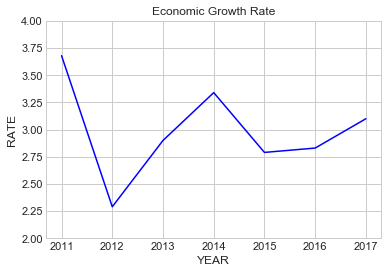

In [124]:
x = [2011, 2012, 2013, 2014, 2015, 2016, 2017]
y = [3.68, 2.29, 2.90, 3.34, 2.79, 2.83, 3.10]
plt.plot(x,y,linestyle='solid', color='blue')
plt.ylim(2.0,4.0)
plt.title("Economic Growth Rate")
plt.xlabel("YEAR")
plt.ylabel("RATE")

### 산점도(Scatter plot)

산점도는 점을 선으로 연결하는 대신 데이터를 개별적인 원 혹은 다른 기호로 표현한다

#### plt.plot을 사용한 산점도

In [127]:
x = np.linspace(0,10,30)
y = np.sin(x)

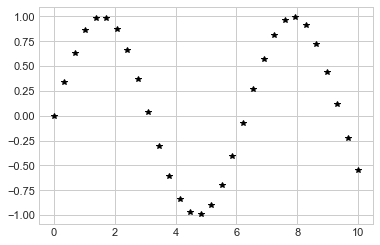

In [133]:
plt.plot(x,y,'*', color='black') 
# x데이터, y데이터, 마커, color='black' 

마커의 종류가 다양하다.
- 마커 종류표 사이트 링크 : 
    https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html

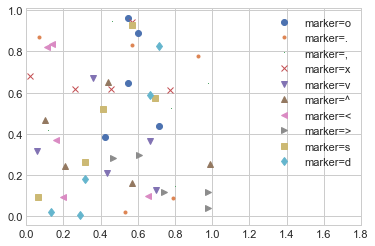

In [134]:
rng = np.random.RandomState(0)
for marker in ['o','.',',','x','v','^','<','>','s','d']:
    plt.plot(rng.rand(5), rng.rand(5), marker, label="marker=%s" % marker)
    plt.legend(numpoints=1) # numpoints 키워드는 범례의 마커 표시 갯 수
    plt.xlim(0, 1.8)